<a href="https://colab.research.google.com/github/ArmaanSethi/Learn-Jax/blob/main/Jax_Tutorial_Pt_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import jax.numpy as jnp
from jax import grad, jit, vmap
from jax import random


In [6]:
key = random.key(0)
print(key)
x = random.normal(key, (10,))
print(x)


Array((), dtype=key<fry>) overlaying:
[0 0]
[-0.3721109   0.26423115 -0.18252768 -0.7368197  -0.44030377 -0.1521442
 -0.67135346 -0.5908641   0.73168886  0.5673026 ]


In [7]:
size = 3000
x = random.normal(key, (size, size), dtype=jnp.float32)
%timeit jnp.dot(x, x.T).block_until_ready()  # runs on the GPU


15.2 ms ± 1.38 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [8]:
import numpy as np
x = np.random.normal(size=(size, size)).astype(np.float32)
%timeit jnp.dot(x, x.T).block_until_ready()


37 ms ± 579 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [9]:
from jax import device_put

x = np.random.normal(size=(size, size)).astype(np.float32)
x = device_put(x)
%timeit jnp.dot(x, x.T).block_until_ready()


16.9 ms ± 98.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [10]:
def selu(x, alpha=1.67, lmbda=1.05):
  return lmbda * jnp.where(x > 0, x, alpha * jnp.exp(x) - alpha)

x = random.normal(key, (1000000,))
%timeit selu(x).block_until_ready()


854 µs ± 66.2 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [11]:
selu_jit = jit(selu)
%timeit selu_jit(x).block_until_ready()


148 µs ± 11.5 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [12]:
def sum_logistic(x):
  return jnp.sum(1.0 / (1.0 + jnp.exp(-x)))

x_small = jnp.arange(3.)
derivative_fn = grad(sum_logistic)
print(derivative_fn(x_small))


[0.25       0.19661194 0.10499357]


In [13]:
def first_finite_differences(f, x):
  eps = 1e-3
  return jnp.array([(f(x + eps * v) - f(x - eps * v)) / (2 * eps)
                   for v in jnp.eye(len(x))])


print(first_finite_differences(sum_logistic, x_small))


[0.24998187 0.1965761  0.10502338]


In [14]:
print(grad(jit(grad(jit(grad(sum_logistic)))))(1.0))


-0.0353256


In [15]:
import jax.numpy as jnp
jnp.add(1, 1.0)  # jax.numpy API implicitly promotes mixed types.


Array(2., dtype=float32, weak_type=True)

In [16]:
from jax import lax
lax.add(1, 1.0)  # jax.lax API requires explicit type promotion.


ValueError: Cannot lower jaxpr with verifier errors:
	'stablehlo.add' op requires compatible types for all operands and results
		at loc("jit(add)/jit(main)/add"(callsite("<cell line: 2>"("<ipython-input-16-63245925fccf>":2:0) at callsite("run_code"("/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py":3553:0) at callsite("run_ast_nodes"("/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py":3473:0) at callsite("run_cell_async"("/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py":3257:0) at callsite("_pseudo_sync_runner"("/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py":78:0) at callsite("_run_cell"("/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py":3030:0) at callsite("run_cell"("/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py":2975:0) at callsite("run_cell"("/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py":539:0) at callsite("do_execute"("/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py":302:0) at "wrapper"("/usr/local/lib/python3.10/dist-packages/tornado/gen.py":234:0))))))))))))
	see current operation: %0 = "stablehlo.add"(%arg0, %arg1) : (tensor<i32>, tensor<f32>) -> tensor<i32>
		at loc("jit(add)/jit(main)/add"(callsite("<cell line: 2>"("<ipython-input-16-63245925fccf>":2:0) at callsite("run_code"("/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py":3553:0) at callsite("run_ast_nodes"("/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py":3473:0) at callsite("run_cell_async"("/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py":3257:0) at callsite("_pseudo_sync_runner"("/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py":78:0) at callsite("_run_cell"("/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py":3030:0) at callsite("run_cell"("/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py":2975:0) at callsite("run_cell"("/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py":539:0) at callsite("do_execute"("/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py":302:0) at "wrapper"("/usr/local/lib/python3.10/dist-packages/tornado/gen.py":234:0))))))))))))Define JAX_DUMP_IR_TO to dump the module.

In [17]:
lax.add(jnp.float32(1), 1.0)


Array(2., dtype=float32)

In [18]:
x = jnp.array([1, 2, 1])
y = jnp.ones(10)
jnp.convolve(x, y)


Array([1., 3., 4., 4., 4., 4., 4., 4., 4., 4., 3., 1.], dtype=float32)

In [19]:
from jax import lax
result = lax.conv_general_dilated(
    x.reshape(1, 1, 3).astype(float),  # note: explicit promotion
    y.reshape(1, 1, 10),
    window_strides=(1,),
    padding=[(len(y) - 1, len(y) - 1)])  # equivalent of padding='full' in NumPy
result[0, 0]


Array([1., 3., 4., 4., 4., 4., 4., 4., 4., 4., 3., 1.], dtype=float32)

In [20]:
import jax.numpy as jnp

def norm(X):
  X = X - X.mean(0)
  return X / X.std(0)


In [21]:
from jax import jit
norm_compiled = jit(norm)


In [22]:
np.random.seed(1701)
X = jnp.array(np.random.rand(10000, 10))
np.allclose(norm(X), norm_compiled(X), atol=1E-6)


True

In [23]:
%timeit norm(X).block_until_ready()
%timeit norm_compiled(X).block_until_ready()


527 µs ± 67.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
161 µs ± 14.9 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [24]:
def get_negatives(x):
  return x[x < 0]

x = jnp.array(np.random.randn(10))
get_negatives(x)


Array([-0.10570311, -0.59403396, -0.8680282 , -0.23489487], dtype=float32)

In [26]:
# jit(get_negatives)(x)


In [28]:
@jit
def f(x, y):
  print("Running f():")
  print(f"  x = {x}")
  print(f"  y = {y}")
  result = jnp.dot(x + 1, y + 1)
  print(f"  result = {result}")
  return result

x = np.random.randn(3, 4)
y = np.random.randn(4)
f(x, y)


Running f():
  x = Traced<ShapedArray(float32[3,4])>with<DynamicJaxprTrace(level=1/0)>
  y = Traced<ShapedArray(float32[4])>with<DynamicJaxprTrace(level=1/0)>
  result = Traced<ShapedArray(float32[3])>with<DynamicJaxprTrace(level=1/0)>


Array([1.4344586, 4.3004413, 7.989701 ], dtype=float32)

In [29]:
x2 = np.random.randn(3, 4)
y2 = np.random.randn(4)
f(x2, y2)


Array([4.1002445, 5.468004 , 1.5471637], dtype=float32)

In [30]:
from jax import make_jaxpr

def f(x, y):
  return jnp.dot(x + 1, y + 1)

make_jaxpr(f)(x, y)


{ lambda ; a:f32[3,4] b:f32[4]. let
    c:f32[3,4] = add a 1.0
    d:f32[4] = add b 1.0
    e:f32[3] = dot_general[
      dimension_numbers=(([1], [0]), ([], []))
      preferred_element_type=float32
    ] c d
  in (e,) }

In [31]:
import jax.numpy as jnp
from jax import jit

@jit
def f(x):
  return x.reshape(jnp.array(x.shape).prod())

x = jnp.ones((2, 3))
f(x)


TypeError: Shapes must be 1D sequences of concrete values of integer type, got [Traced<ShapedArray(int32[])>with<DynamicJaxprTrace(level=1/0)>].
If using `jit`, try using `static_argnums` or applying `jit` to smaller subfunctions.
The error occurred while tracing the function f at <ipython-input-31-5fa933a68063>:4 for jit. This value became a tracer due to JAX operations on these lines:

  operation a:i32[2] = convert_element_type[new_dtype=int32 weak_type=False] b
    from line <ipython-input-31-5fa933a68063>:6 (f)

In [32]:
@jit
def f(x):
  print(f"x = {x}")
  print(f"x.shape = {x.shape}")
  print(f"jnp.array(x.shape).prod() = {jnp.array(x.shape).prod()}")
  # comment this out to avoid the error:
  # return x.reshape(jnp.array(x.shape).prod())

f(x)


x = Traced<ShapedArray(float32[2,3])>with<DynamicJaxprTrace(level=1/0)>
x.shape = (2, 3)
jnp.array(x.shape).prod() = Traced<ShapedArray(int32[])>with<DynamicJaxprTrace(level=1/0)>


In [33]:
from jax import jit
import jax.numpy as jnp
import numpy as np

@jit
def f(x):
  return x.reshape((np.prod(x.shape),))

f(x)


Array([1., 1., 1., 1., 1., 1.], dtype=float32)

In [34]:
import numpy as np
from jax import grad, jit
from jax import lax
from jax import random
import jax
import jax.numpy as jnp

In [35]:
def impure_print_side_effect(x):
  print("Executing function")  # This is a side-effect
  return x

# The side-effects appear during the first run
print ("First call: ", jit(impure_print_side_effect)(4.))

# Subsequent runs with parameters of same type and shape may not show the side-effect
# This is because JAX now invokes a cached compilation of the function
print ("Second call: ", jit(impure_print_side_effect)(5.))

# JAX re-runs the Python function when the type or shape of the argument changes
print ("Third call, different type: ", jit(impure_print_side_effect)(jnp.array([5.])))


Executing function
First call:  4.0
Second call:  5.0
Executing function
Third call, different type:  [5.]


In [36]:
g = 0.
def impure_uses_globals(x):
  return x + g

# JAX captures the value of the global during the first run
print ("First call: ", jit(impure_uses_globals)(4.))
g = 10.  # Update the global

# Subsequent runs may silently use the cached value of the globals
print ("Second call: ", jit(impure_uses_globals)(5.))

# JAX re-runs the Python function when the type or shape of the argument changes
# This will end up reading the latest value of the global
print ("Third call, different type: ", jit(impure_uses_globals)(jnp.array([4.])))


First call:  4.0
Second call:  5.0
Third call, different type:  [14.]


In [37]:
g = 0.
def impure_saves_global(x):
  global g
  g = x
  return x

# JAX runs once the transformed function with special Traced values for arguments
print ("First call: ", jit(impure_saves_global)(4.))
print ("Saved global: ", g)  # Saved global has an internal JAX value


First call:  4.0
Saved global:  Traced<ShapedArray(float32[], weak_type=True)>with<DynamicJaxprTrace(level=1/0)>


In [38]:
def pure_uses_internal_state(x):
  state = dict(even=0, odd=0)
  for i in range(10):
    state['even' if i % 2 == 0 else 'odd'] += x
  return state['even'] + state['odd']

print(jit(pure_uses_internal_state)(5.))


50.0


In [39]:
import jax.numpy as jnp
import jax.lax as lax
from jax import make_jaxpr

# lax.fori_loop
array = jnp.arange(10)
print(lax.fori_loop(0, 10, lambda i,x: x+array[i], 0)) # expected result 45
iterator = iter(range(10))
print(lax.fori_loop(0, 10, lambda i,x: x+next(iterator), 0)) # unexpected result 0

# lax.scan
def func11(arr, extra):
    ones = jnp.ones(arr.shape)
    def body(carry, aelems):
        ae1, ae2 = aelems
        return (carry + ae1 * ae2 + extra, carry)
    return lax.scan(body, 0., (arr, ones))
make_jaxpr(func11)(jnp.arange(16), 5.)
# make_jaxpr(func11)(iter(range(16)), 5.) # throws error

# lax.cond
array_operand = jnp.array([0.])
lax.cond(True, lambda x: x+1, lambda x: x-1, array_operand)
iter_operand = iter(range(10))
# lax.cond(True, lambda x: next(x)+1, lambda x: next(x)-1, iter_operand) # throws error

45
0


In [40]:
numpy_array = np.zeros((3,3), dtype=np.float32)
print("original array:")
print(numpy_array)

# In place, mutating update
numpy_array[1, :] = 1.0
print("updated array:")
print(numpy_array)


original array:
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
updated array:
[[0. 0. 0.]
 [1. 1. 1.]
 [0. 0. 0.]]


In [41]:
%xmode Minimal


Exception reporting mode: Minimal


In [42]:
jax_array = jnp.zeros((3,3), dtype=jnp.float32)

# In place update of JAX's array will yield an error!
jax_array[1, :] = 1.0


TypeError: '<class 'jaxlib.xla_extension.ArrayImpl'>' object does not support item assignment. JAX arrays are immutable. Instead of ``x[idx] = y``, use ``x = x.at[idx].set(y)`` or another .at[] method: https://jax.readthedocs.io/en/latest/_autosummary/jax.numpy.ndarray.at.html

In [43]:
updated_array = jax_array.at[1, :].set(1.0)
print("updated array:\n", updated_array)


updated array:
 [[0. 0. 0.]
 [1. 1. 1.]
 [0. 0. 0.]]


In [44]:
print("original array unchanged:\n", jax_array)


original array unchanged:
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [45]:
print("original array:")
jax_array = jnp.ones((5, 6))
print(jax_array)

new_jax_array = jax_array.at[::2, 3:].add(7.)
print("new array post-addition:")
print(new_jax_array)


original array:
[[1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]]
new array post-addition:
[[1. 1. 1. 8. 8. 8.]
 [1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 8. 8. 8.]
 [1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 8. 8. 8.]]


In [46]:
np.arange(10)[11]


IndexError: index 11 is out of bounds for axis 0 with size 10

In [47]:
jnp.arange(10)[11]


Array(9, dtype=int32)

In [48]:
jnp.arange(10.0).at[11].get()


Array(9., dtype=float32)

In [49]:
jnp.arange(10.0).at[11].get(mode='fill', fill_value=jnp.nan)


Array(nan, dtype=float32)

In [50]:
np.sum([1, 2, 3])


6

In [51]:
jnp.sum([1, 2, 3])


TypeError: sum requires ndarray or scalar arguments, got <class 'list'> at position 0.

In [52]:
def permissive_sum(x):
  return jnp.sum(jnp.array(x))

x = list(range(10))
permissive_sum(x)


Array(45, dtype=int32)

In [53]:
make_jaxpr(permissive_sum)(x)


{ lambda ; a:i32[] b:i32[] c:i32[] d:i32[] e:i32[] f:i32[] g:i32[] h:i32[] i:i32[]
    j:i32[]. let
    k:i32[] = convert_element_type[new_dtype=int32 weak_type=False] a
    l:i32[] = convert_element_type[new_dtype=int32 weak_type=False] b
    m:i32[] = convert_element_type[new_dtype=int32 weak_type=False] c
    n:i32[] = convert_element_type[new_dtype=int32 weak_type=False] d
    o:i32[] = convert_element_type[new_dtype=int32 weak_type=False] e
    p:i32[] = convert_element_type[new_dtype=int32 weak_type=False] f
    q:i32[] = convert_element_type[new_dtype=int32 weak_type=False] g
    r:i32[] = convert_element_type[new_dtype=int32 weak_type=False] h
    s:i32[] = convert_element_type[new_dtype=int32 weak_type=False] i
    t:i32[] = convert_element_type[new_dtype=int32 weak_type=False] j
    u:i32[1] = broadcast_in_dim[broadcast_dimensions=() shape=(1,)] k
    v:i32[1] = broadcast_in_dim[broadcast_dimensions=() shape=(1,)] l
    w:i32[1] = broadcast_in_dim[broadcast_dimensions=() shap

In [54]:
jnp.sum(jnp.array(x))

Array(45, dtype=int32)

In [55]:
print(np.random.random())
print(np.random.random())
print(np.random.random())


0.9548190168792293
0.12555013759546874
0.57549488523015


In [58]:
np.random.seed(0)
rng_state = np.random.get_state()
# print(rng_state)
# --> ('MT19937', array([0, 1, 1812433255, 1900727105, 1208447044,
#       2481403966, 4042607538,  337614300, ... 614 more numbers...,
#       3048484911, 1796872496], dtype=uint32), 624, 0, 0.0)


In [59]:
_ = np.random.uniform()
rng_state = np.random.get_state()
#print(rng_state)
# --> ('MT19937', array([2443250962, 1093594115, 1878467924,
#       ..., 2648828502, 1678096082], dtype=uint32), 2, 0, 0.0)

# Let's exhaust the entropy in this PRNG statevector
for i in range(311):
  _ = np.random.uniform()
rng_state = np.random.get_state()
#print(rng_state)
# --> ('MT19937', array([2443250962, 1093594115, 1878467924,
#       ..., 2648828502, 1678096082], dtype=uint32), 624, 0, 0.0)

# Next call iterates the RNG state for a new batch of fake "entropy".
_ = np.random.uniform()
rng_state = np.random.get_state()
# print(rng_state)
# --> ('MT19937', array([1499117434, 2949980591, 2242547484,
#      4162027047, 3277342478], dtype=uint32), 2, 0, 0.0)


In [60]:
from jax import random
key = random.key(0)
key


Array((), dtype=key<fry>) overlaying:
[0 0]

In [61]:
print(random.normal(key, shape=(1,)))
print(key)
# No no no!
print(random.normal(key, shape=(1,)))
print(key)


[-0.20584226]
Array((), dtype=key<fry>) overlaying:
[0 0]
[-0.20584226]
Array((), dtype=key<fry>) overlaying:
[0 0]


In [62]:
print("old key", key)
key, subkey = random.split(key)
normal_pseudorandom = random.normal(subkey, shape=(1,))
print("    \---SPLIT --> new key   ", key)
print("             \--> new subkey", subkey, "--> normal", normal_pseudorandom)


old key Array((), dtype=key<fry>) overlaying:
[0 0]
    \---SPLIT --> new key    Array((), dtype=key<fry>) overlaying:
[4146024105  967050713]
             \--> new subkey Array((), dtype=key<fry>) overlaying:
[2718843009 1272950319] --> normal [-1.2515389]


In [63]:
print("old key", key)
key, subkey = random.split(key)
normal_pseudorandom = random.normal(subkey, shape=(1,))
print("    \---SPLIT --> new key   ", key)
print("             \--> new subkey", subkey, "--> normal", normal_pseudorandom)


old key Array((), dtype=key<fry>) overlaying:
[4146024105  967050713]
    \---SPLIT --> new key    Array((), dtype=key<fry>) overlaying:
[2384771982 3928867769]
             \--> new subkey Array((), dtype=key<fry>) overlaying:
[1278412471 2182328957] --> normal [-0.58665055]


In [64]:
key, *subkeys = random.split(key, 4)
for subkey in subkeys:
  print(random.normal(subkey, shape=(1,)))


[-0.37533438]
[0.98645043]
[0.14553197]


JAX 101

In [65]:
import jax
import jax.numpy as jnp

x = jnp.arange(10)
print(x)


[0 1 2 3 4 5 6 7 8 9]


In [66]:
x


Array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)

In [67]:
long_vector = jnp.arange(int(1e7))

%timeit jnp.dot(long_vector, long_vector).block_until_ready()


373 µs ± 40.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [68]:
def sum_of_squares(x):
  return jnp.sum(x**2)


In [69]:
sum_of_squares_dx = jax.grad(sum_of_squares)

x = jnp.asarray([1.0, 2.0, 3.0, 4.0])

print(sum_of_squares(x))

print(sum_of_squares_dx(x))


30.0
[2. 4. 6. 8.]


In [70]:
def sum_squared_error(x, y):
  return jnp.sum((x-y)**2)

sum_squared_error_dx = jax.grad(sum_squared_error)

y = jnp.asarray([1.1, 2.1, 3.1, 4.1])

print(sum_squared_error_dx(x, y))


[-0.20000005 -0.19999981 -0.19999981 -0.19999981]


In [71]:
jax.grad(sum_squared_error, argnums=(0, 1))(x, y)  # Find gradient wrt both x & y


(Array([-0.20000005, -0.19999981, -0.19999981, -0.19999981], dtype=float32),
 Array([0.20000005, 0.19999981, 0.19999981, 0.19999981], dtype=float32))

In [72]:
jax.value_and_grad(sum_squared_error)(x, y)


(Array(0.03999995, dtype=float32),
 Array([-0.20000005, -0.19999981, -0.19999981, -0.19999981], dtype=float32))

In [73]:
def squared_error_with_aux(x, y):
  return sum_squared_error(x, y), x-y

jax.grad(squared_error_with_aux)(x, y)


TypeError: Gradient only defined for scalar-output functions. Output was (Array(0.03999995, dtype=float32), Array([-0.10000002, -0.0999999 , -0.0999999 , -0.0999999 ], dtype=float32)).

In [74]:
jax.grad(squared_error_with_aux, has_aux=True)(x, y)


(Array([-0.20000005, -0.19999981, -0.19999981, -0.19999981], dtype=float32),
 Array([-0.10000002, -0.0999999 , -0.0999999 , -0.0999999 ], dtype=float32))

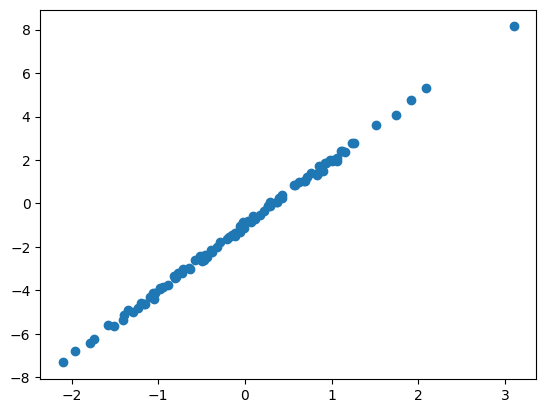

In [75]:
import numpy as np
import matplotlib.pyplot as plt

xs = np.random.normal(size=(100,))
noise = np.random.normal(scale=0.1, size=(100,))
ys = xs * 3 - 1 + noise

plt.scatter(xs, ys);


In [76]:
def model(theta, x):
  """Computes wx + b on a batch of input x."""
  w, b = theta
  return w * x + b


In [77]:
def loss_fn(theta, x, y):
  prediction = model(theta, x)
  return jnp.mean((prediction-y)**2)


In [78]:
def update(theta, x, y, lr=0.1):
  return theta - lr * jax.grad(loss_fn)(theta, x, y)


w: 3.00, b: -1.01


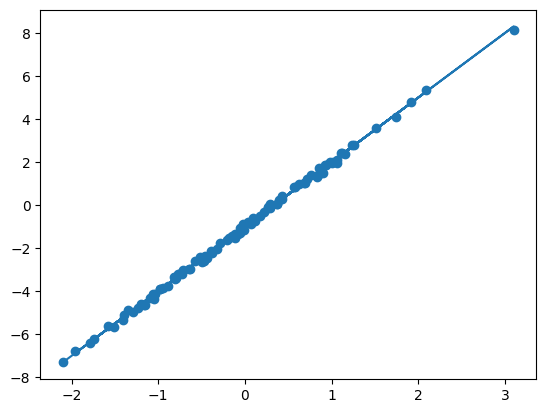

In [79]:
theta = jnp.array([1., 1.])

for _ in range(1000):
  theta = update(theta, xs, ys)

plt.scatter(xs, ys)
plt.plot(xs, model(theta, xs))

w, b = theta
print(f"w: {w:<.2f}, b: {b:<.2f}")
